In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Load dataset
file_path = "/content/Download Data - STOCK_US_XNAS_AMZN.csv"
df = pd.read_csv(file_path)

In [ ]:
# Step 1: Convert 'Date' to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

In [ ]:
# Step 2: Clean 'Volume' column
df['Volume'] = df['Volume'].str.replace(',', '').astype(float)

In [ ]:
# Step 3: Ensure 'Close' is numeric and drop missing values
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df = df.dropna(subset=['Close'])

In [ ]:
# Step 4: Set 'Date' as index
df.set_index('Date', inplace=True)

In [ ]:
# View cleaned data
print(df)

              Open    High     Low   Close      Volume
Date                                                  
2025-01-02  222.03  225.15  218.19  220.22  33956578.0
2025-01-03  222.51  225.36  221.62  224.19  27515609.0
2025-01-06  226.78  228.84  224.84  227.61  31849830.0
2025-01-07  227.90  228.38  221.46  222.11  28084160.0
2025-01-08  223.19  223.52  220.20  222.13  25033289.0
...            ...     ...     ...     ...         ...
2025-03-26  205.84  206.01  199.93  201.13  32990969.0
2025-03-27  200.89  203.79  199.28  201.36  27317660.0
2025-03-28  198.42  199.26  191.88  192.72  52548230.0
2025-03-31  188.19  191.33  184.40  190.26  63547559.0
2025-04-01  187.86  193.93  187.20  192.17  41267320.0

[61 rows x 5 columns]


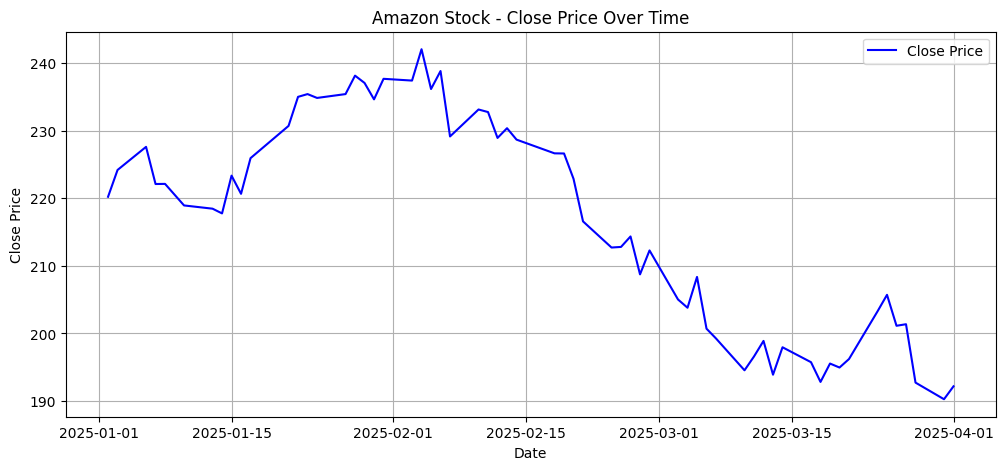

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title('Amazon Stock - Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()


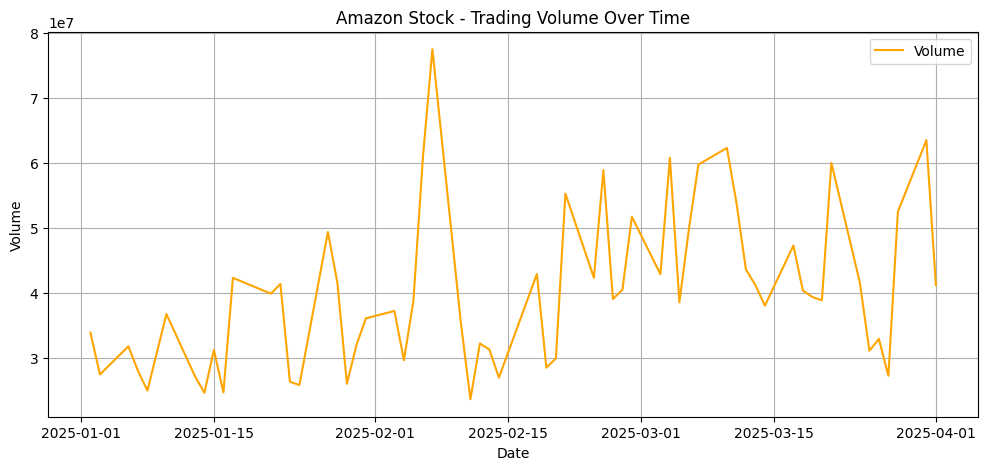

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df['Volume'], label='Volume', color='orange')
plt.title('Amazon Stock - Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show()


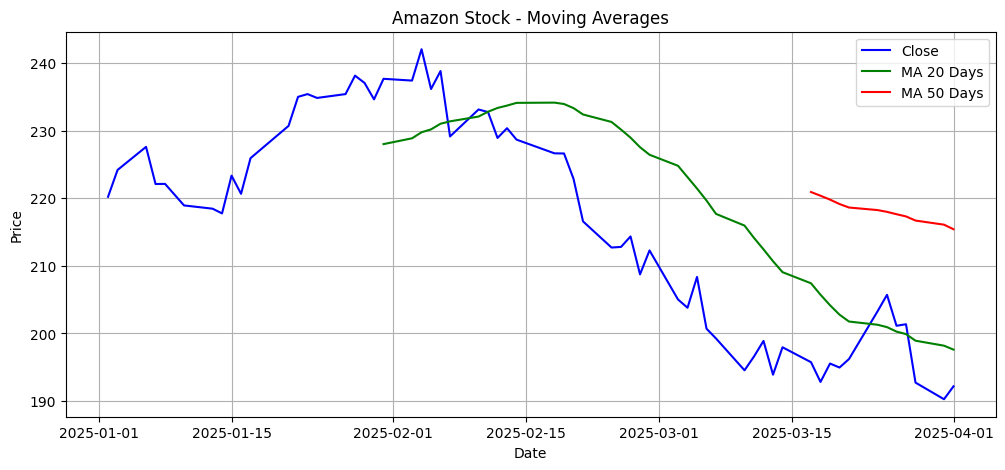

In [ ]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Close', color='blue')
plt.plot(df['MA20'], label='MA 20 Days', color='green')
plt.plot(df['MA50'], label='MA 50 Days', color='red')
plt.title('Amazon Stock - Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


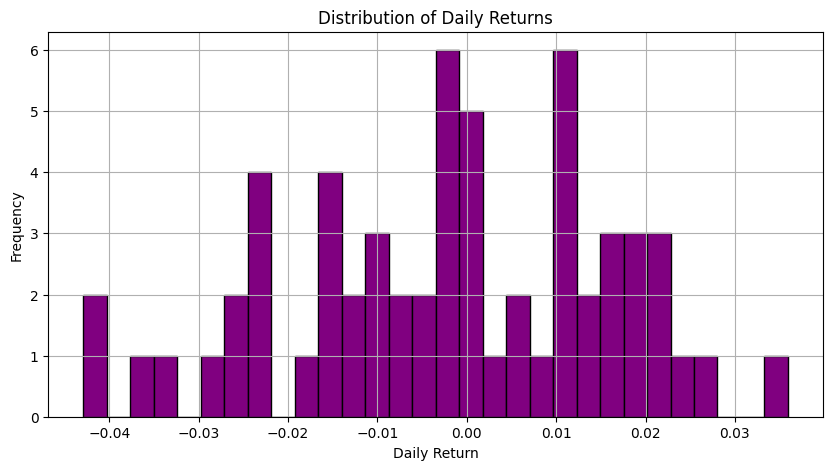

In [ ]:
df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(10, 5))
df['Daily Return'].hist(bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


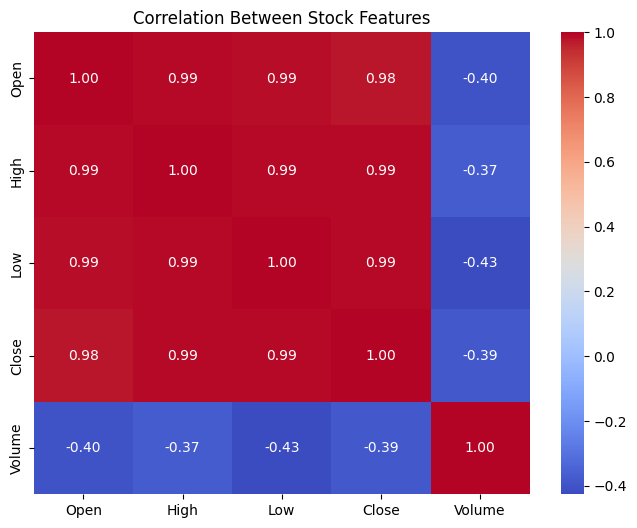

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Stock Features')
plt.show()


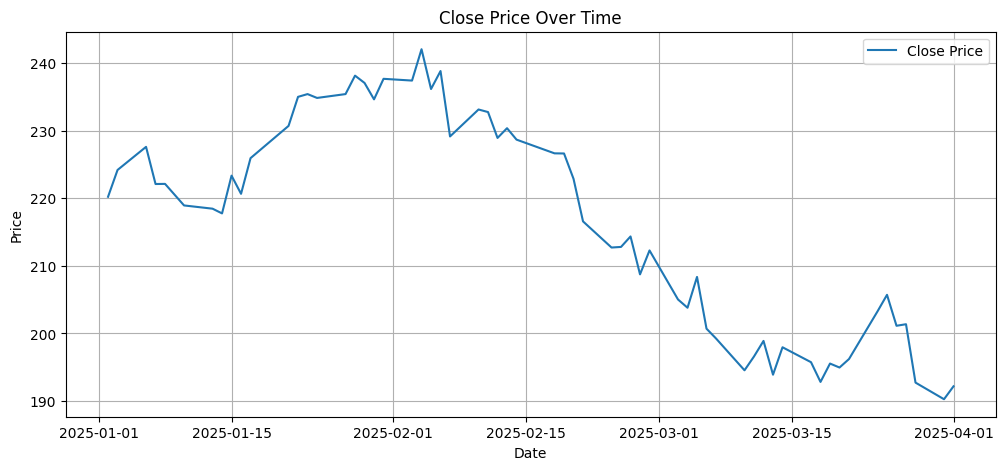

Augmented Dickey-Fuller Test Results:
ADF Statistic      : -0.0284
p-value            : 0.9561
Critical Values    :
   1%: -3.5464
   5%: -2.9119
   10%: -2.5937

⚠️ The series is likely non-stationary (fail to reject null hypothesis).


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Select your time series
ts = df['Close']

# --- 1. Plot the time series ---
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(ts, label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# --- 2. Perform ADF test ---
adf_result = adfuller(ts.dropna())

print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic      : {adf_result[0]:.4f}")
print(f"p-value            : {adf_result[1]:.4f}")
print(f"Critical Values    :")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")

# Interpretation hint
if adf_result[1] < 0.05:
    print("\n✅ The series is likely stationary (reject null hypothesis).")
else:
    print("\n⚠️ The series is likely non-stationary (fail to reject null hypothesis).")


In [ ]:
df['Close_diff'] = df['Close'].diff().dropna()

# Re-run ADF test on differenced series
adf_result_diff = adfuller(df['Close_diff'].dropna())

print("\nAfter First Differencing:")
print(f"ADF Statistic: {adf_result_diff[0]:.4f}")
print(f"p-value: {adf_result_diff[1]:.4f}")



After First Differencing:
ADF Statistic: -9.2157
p-value: 0.0000


In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['Close_diff'].dropna())

print("ADF Statistic (Differenced):", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] < 0.05:
    print("✅ Series is now stationary.")
else:
    print("⚠️ Series is still non-stationary. Consider second differencing.")


ADF Statistic (Differenced): -9.215667242262489
p-value: 1.836809491863169e-15
✅ Series is now stationary.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

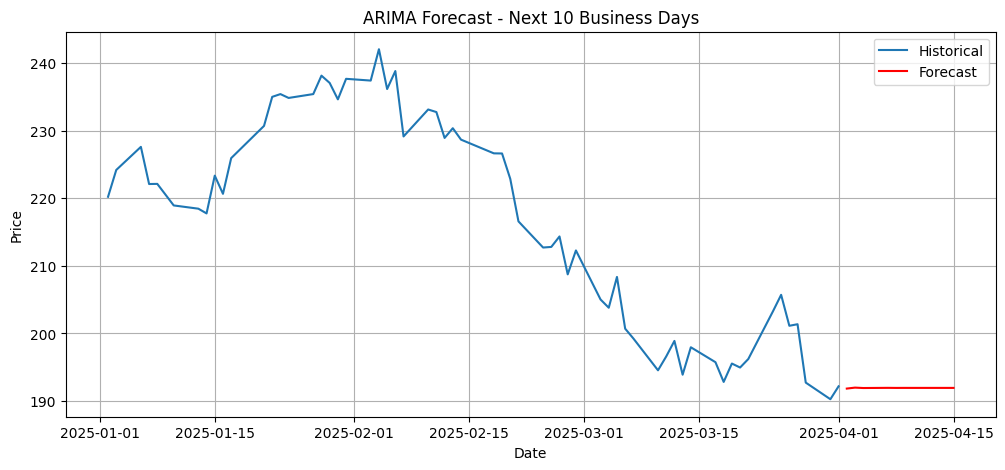

In [ ]:
# Rebuild and fit the model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Forecasting next 10 days
n_periods = 10
forecast = model_fit.forecast(steps=n_periods)

# Create future date index
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods, freq='B')  # 'B' = business days
forecast.index = future_dates

# Plot it
plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast - Next 10 Business Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Assuming 'df' is your preprocessed DataFrame with datetime index and 'Close' column

# Step 1: Train/Test Split
train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Step 2: Fit the model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Step 3: Forecast
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index  # Align forecast with actual test dates


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


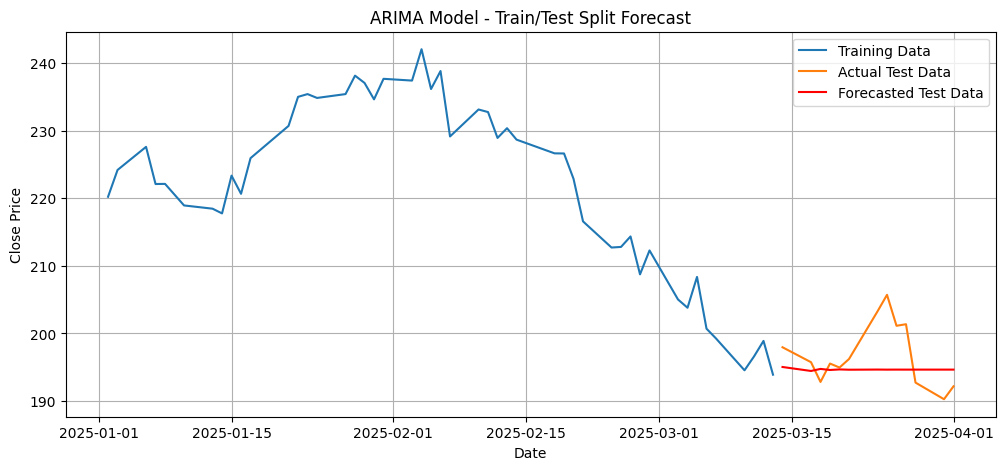

In [ ]:
import matplotlib.pyplot as plt

# Step 4: Plot the forecast vs actual test data
plt.figure(figsize=(12,5))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(forecast, label='Forecasted Test Data', color='red')
plt.title('ARIMA Model - Train/Test Split Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Get residuals from the fitted model
residuals = model_fit.resid


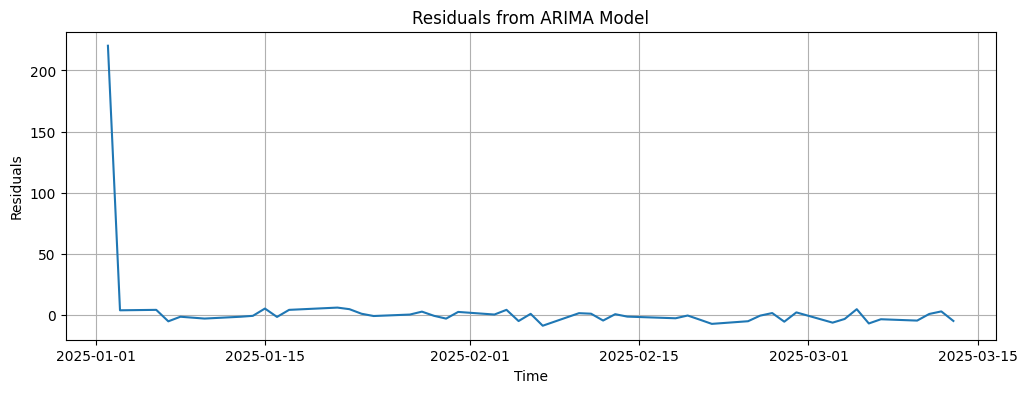

In [ ]:
# Residual Plot
plt.figure(figsize=(12, 4))
plt.plot(residuals)
plt.title("Residuals from ARIMA Model")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


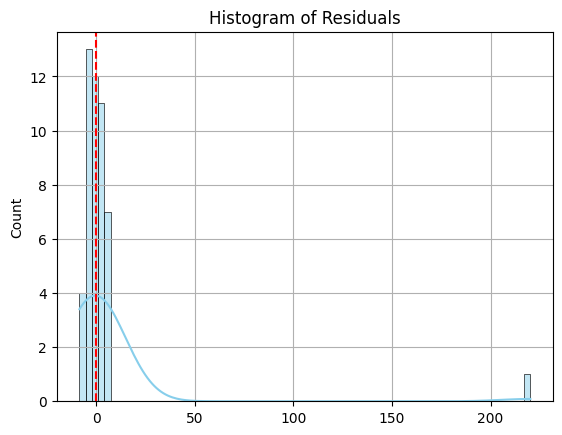

In [ ]:

# Histogram
sns.histplot(residuals, kde=True, color='skyblue')
plt.title("Histogram of Residuals")
plt.axvline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()


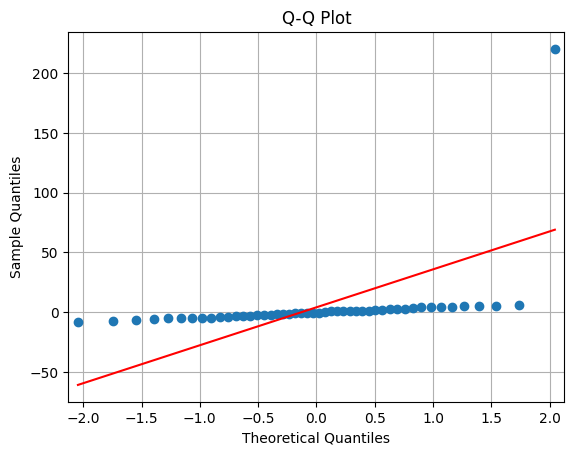

In [ ]:

# Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot")
plt.grid(True)
plt.show()


In [ ]:
outliers = residuals[np.abs(residuals) > 3 * residuals.std()]
print(outliers)


Date
2025-01-02    220.22
dtype: float64


In [ ]:
# Drop the outlier
residuals_no_outlier = residuals[residuals < 3 * residuals.std()]


In [ ]:
from scipy.stats.mstats import winsorize
residuals_winsorized = winsorize(residuals, limits=[0.01, 0.01])


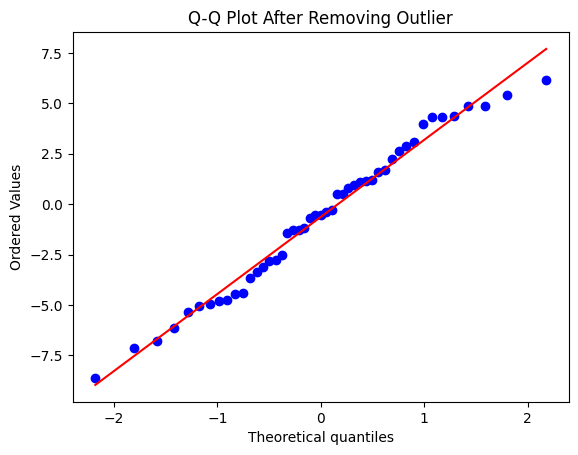

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals_no_outlier, dist="norm", plot=plt)
plt.title("Q-Q Plot After Removing Outlier")
plt.show()


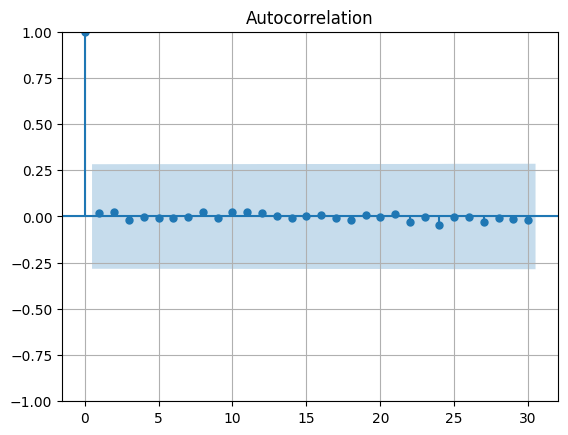

In [ ]:

# ACF
sm.graphics.tsa.plot_acf(residuals, lags=30)
plt.grid(True)
plt.show()


In [ ]:

# Ljung-Box Test
from statsmodels.stats.diagnostic import acorr_ljungbox
print(acorr_ljungbox(residuals, lags=[10], return_df=True))


     lb_stat  lb_pvalue
10  0.144355        1.0


Length of test set: 13
Length of pred_returns: 12


<ipython-input-24-6ea21f512bc7>:34: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


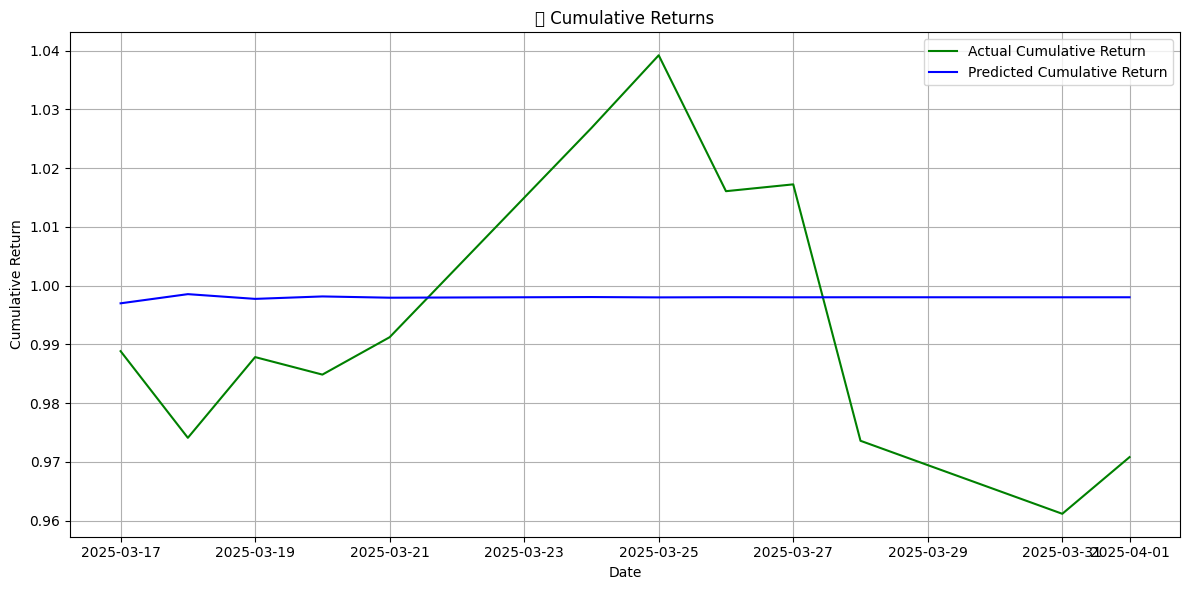

<ipython-input-24-6ea21f512bc7>:48: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


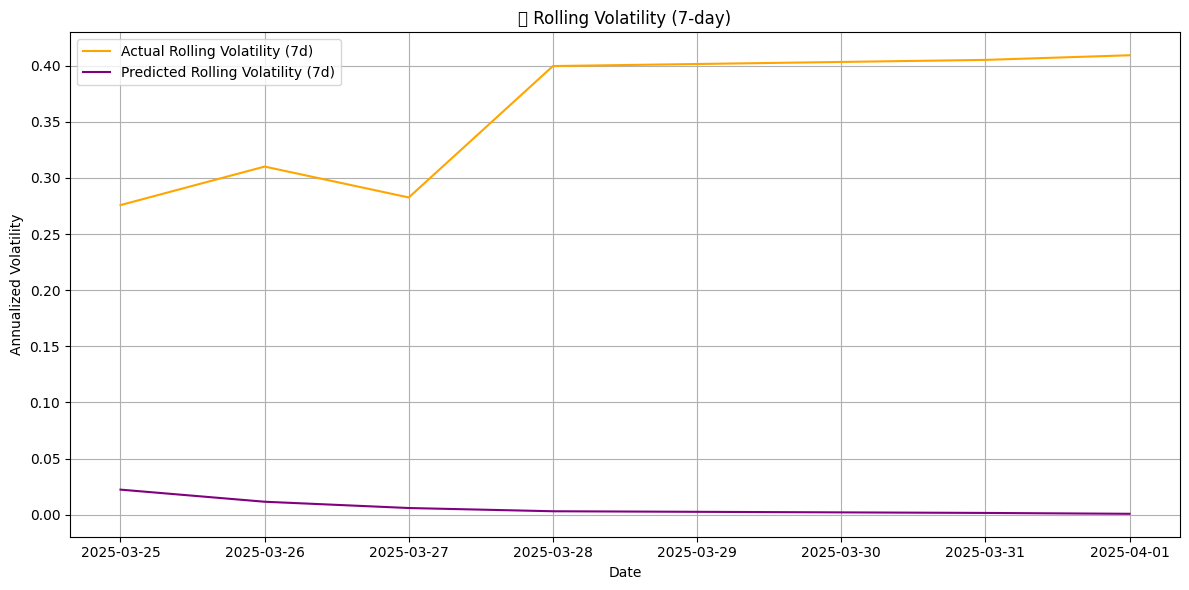

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convert to Series (ensure index is aligned with dates if available)
pred_series = pd.Series(forecast, index=test.index)
actual_series = pd.Series(test.values, index=test.index)

# 1️⃣ Daily Returns
pred_returns = pred_series.pct_change().dropna()
actual_returns = actual_series.pct_change().dropna()

# 2️⃣ Cumulative Returns
cum_actual_returns = (1 + actual_returns).cumprod()
cum_pred_returns = (1 + pred_returns).cumprod()

# Try a smaller window (e.g., 10 days)
rolling_vol_actual = actual_returns.rolling(window=10).std() * np.sqrt(252)
rolling_vol_pred = pred_returns.rolling(window=10).std() * np.sqrt(252)

print(f"Length of test set: {len(test)}")
print(f"Length of pred_returns: {len(pred_returns)}")


# 4️⃣ Plot Cumulative Returns
plt.figure(figsize=(12, 6))
plt.plot(cum_actual_returns, label="Actual Cumulative Return", color='green')
plt.plot(cum_pred_returns, label="Predicted Cumulative Return", color='blue')
plt.title("📈 Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

rolling_vol_actual = actual_returns.rolling(window=7).std() * np.sqrt(252)
rolling_vol_pred = pred_returns.rolling(window=7).std() * np.sqrt(252)

plt.figure(figsize=(12, 6))
plt.plot(rolling_vol_actual, label="Actual Rolling Volatility (7d)", color='orange')
plt.plot(rolling_vol_pred, label="Predicted Rolling Volatility (7d)", color='purple')
plt.title("📉 Rolling Volatility (7-day)")
plt.xlabel("Date")
plt.ylabel("Annualized Volatility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


🚨 Max Drawdown: -0.08%


<ipython-input-25-99f86afea0a1>:20: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


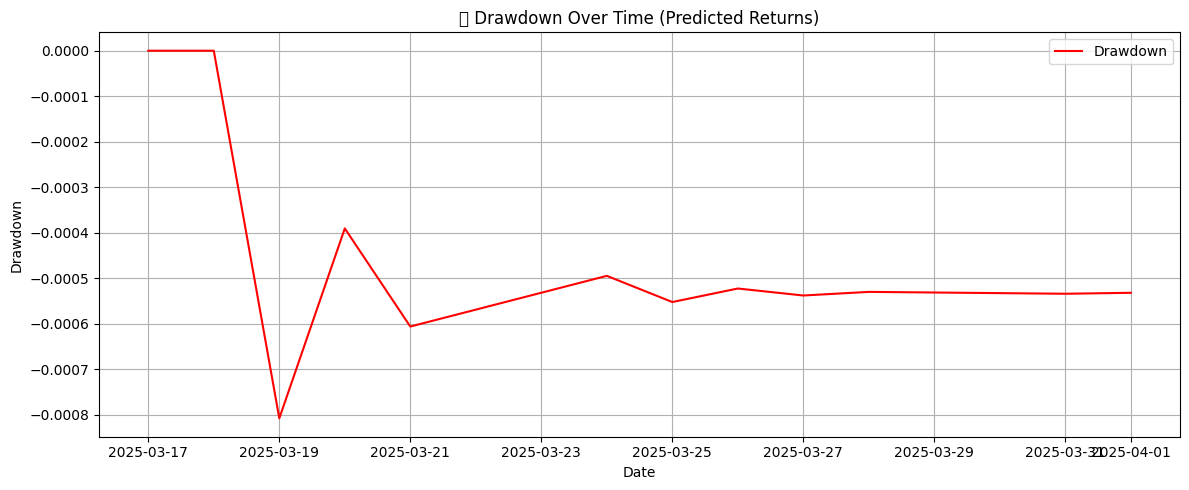

In [ ]:
# Cumulative return series (reuse from earlier)
cumulative_returns = (1 + pred_returns).cumprod()

# Calculate drawdown
rolling_max = cumulative_returns.cummax()
drawdown = cumulative_returns / rolling_max - 1
max_drawdown = drawdown.min()

# Print Max Drawdown
print(f"🚨 Max Drawdown: {max_drawdown:.2%}")

# Plot Drawdown
plt.figure(figsize=(12, 5))
plt.plot(drawdown, color='red', label='Drawdown')
plt.title("🔻 Drawdown Over Time (Predicted Returns)")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


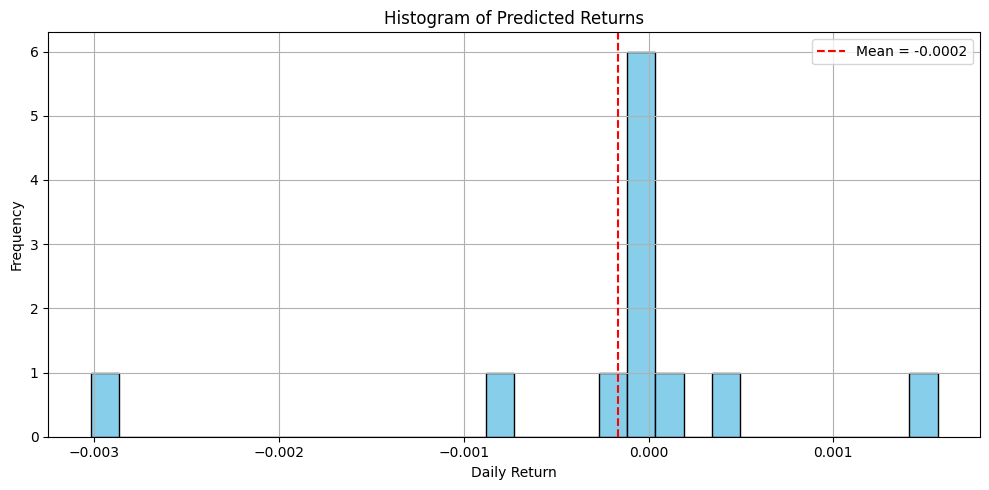

In [ ]:
# Histogram of predicted returns
plt.figure(figsize=(10, 5))
plt.hist(pred_returns, bins=30, color='skyblue', edgecolor='black')
plt.axvline(pred_returns.mean(), color='red', linestyle='dashed', linewidth=1.5, label=f"Mean = {pred_returns.mean():.4f}")
plt.title("Histogram of Predicted Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
